<a href="https://colab.research.google.com/github/barywhyte/analytics/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import json
from collections import Counter

In [0]:
if not os.path.exists('secret_twitter_credentials.pk1'):
    Twitter={}
    Twitter['Consumer Key'] = 'xZVjdUsRKxXSrMf84aUmi2Z8r'
    Twitter['Consumer Secret'] = '3eAePURpb6BGOCzgBgMDvTcfgHaRTGIVDKPfJtqW1wAXQ9bu4p'
    Twitter['Access Token'] = '170752375-Ivr4rxs0bVFQY4PXPyKVTHtgVyWxydvZrCFVvuFI'
    Twitter['Access Token Secret'] = 'Iw5qHRxGxDY7qtDT47aXgc6O0Ufo2UCddlLDkK5FOGoEz'
    with open('secret_twitter_credentials_again.pk1', 'wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pk1', 'rb'))

In [9]:
#Install twitter package to interface with twitter API. Already installed
pip install twitter

In [10]:
import twitter

authentication = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret']
                          )
my_twitter_api = twitter.Twitter(auth=authentication)
print(my_twitter_api)

#Nothing to see here except that twitter_api is now a defined variable

In [0]:
#WOEID Lookup makes it really easy to find Yahoo! WOEIDs for any location on Earth.
#http://woeid.rosselliot.co.nz

NIGERIA_WOE_ID = 23424908

In [12]:
nigeria_trends = my_twitter_api.trends.place(_id=NIGERIA_WOE_ID)
nigeria_trends

[{'as_of': '2019-04-09T08:40:42Z',
  'created_at': '2019-04-09T08:34:54Z',
  'locations': [{'name': 'Nigeria', 'woeid': 23424908}],
  'trends': [{'name': '#NFFCShow',
    'promoted_content': None,
    'query': '%23NFFCShow',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=%23NFFCShow'},
   {'name': '#TuesdayThoughts',
    'promoted_content': None,
    'query': '%23TuesdayThoughts',
    'tweet_volume': 27529,
    'url': 'http://twitter.com/search?q=%23TuesdayThoughts'},
   {'name': '#TuesdayMotivation',
    'promoted_content': None,
    'query': '%23TuesdayMotivation',
    'tweet_volume': 11135,
    'url': 'http://twitter.com/search?q=%23TuesdayMotivation'},
   {'name': '#TuesdayMorning',
    'promoted_content': None,
    'query': '%23TuesdayMorning',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=%23TuesdayMorning'},
   {'name': '#WhereToGoCandiJess',
    'promoted_content': None,
    'query': '%23WhereToGoCandiJess',
    'tweet_volume': None,
    '

In [13]:
nigeria = (json.dumps(nigeria_trends, indent=2))

print(type(nigeria_trends))
print(type(nigeria))
print(nigeria)

<class 'twitter.api.TwitterListResponse'>
<class 'str'>
[
  {
    "trends": [
      {
        "name": "#NFFCShow",
        "url": "http://twitter.com/search?q=%23NFFCShow",
        "promoted_content": null,
        "query": "%23NFFCShow",
        "tweet_volume": null
      },
      {
        "name": "#TuesdayThoughts",
        "url": "http://twitter.com/search?q=%23TuesdayThoughts",
        "promoted_content": null,
        "query": "%23TuesdayThoughts",
        "tweet_volume": 27529
      },
      {
        "name": "#TuesdayMotivation",
        "url": "http://twitter.com/search?q=%23TuesdayMotivation",
        "promoted_content": null,
        "query": "%23TuesdayMotivation",
        "tweet_volume": 11135
      },
      {
        "name": "#TuesdayMorning",
        "url": "http://twitter.com/search?q=%23TuesdayMorning",
        "promoted_content": null,
        "query": "%23TuesdayMorning",
        "tweet_volume": null
      },
      {
        "name": "#WhereToGoCandiJess",
        "ur

In [14]:
topic = 'Nigeria'
tweet_texts = []
number = 100
tweets = my_twitter_api.search.tweets(q = topic, count=number)
tweets = (tweets['statuses'])
for line in tweets:
    tweet_texts.append(line['text'])

len(tweet_texts)

87

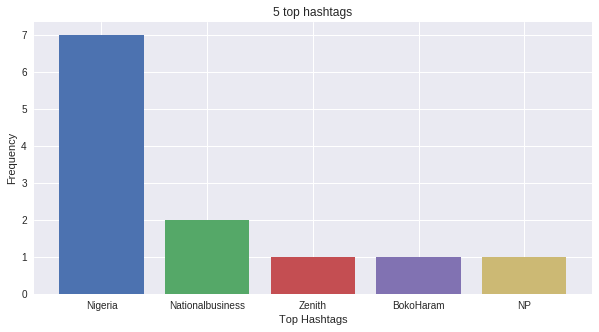

[('Nigeria', 7), ('Nationalbusiness', 2), ('Zenith', 1), ('BokoHaram', 1), ('NP', 1), ('Selbstmordanschlag', 1), ('fvckyouchallenge', 1), ('JKIA', 1), ('Ghosn', 1), ('design', 1), ('Wizkid', 1), ('Piracy', 1), ('Bangladesh', 1), ('morning', 1), ('IBMag', 1), ('Kaduna', 1), ('internetshutdowns', 1), ('telecom', 1), ('TravelTuesday', 1), ('betterdays', 1), ('Africa', 1), ('Muhammed', 1), ('ACJA_NG', 1)]


In [15]:
hashtags_in = []
for line in tweets:
    hashtags_in.append(line['entities']['hashtags'])
hashtags_in = [k for k in hashtags_in if k]
hashtags_in_tweet = []
for b in hashtags_in:
    a = b[0]['text']
    hashtags_in_tweet.append(a)
for item in [hashtags_in_tweet]:
    c = Counter(item)
    hashtags_in_tweet = c.most_common()
    
    
plt.figure(figsize=(10,5))
for k, n in hashtags_in_tweet[:5]:
   
    plt.bar(k, height=n)
    plt.ylabel('Frequency')
    plt.xlabel('Top Hashtags')
    plt.title('5 top hashtags')
        
plt.show()
print(hashtags_in_tweet)

In [16]:
screen_name_list = []
for line in tweets:
    names = line['entities']['user_mentions']
    screen_name_list.append(names)
screen_name_list = [x for x in screen_name_list if x]

values = screen_name_list
popular_names = []
for b in values:
    m = b[0]['screen_name']
    popular_names.append(m)
for item in [popular_names]:
    c = Counter(item)
    top_screen_names = (c.most_common()) 
top_screen_names[:5]

[('TheCityBizNews', 3),
 ('PTV_NG', 3),
 ('OgbeniDipo', 3),
 ('ovieali', 3),
 ('EhviOg', 3)]

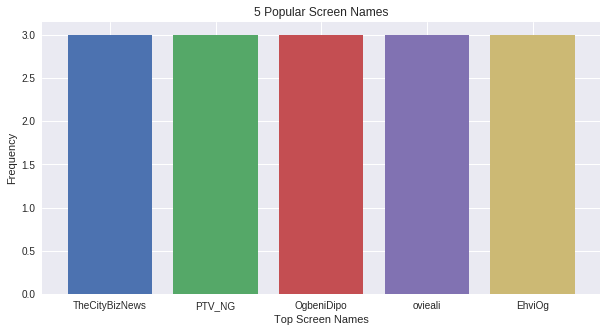

In [17]:

plt.figure(figsize=(10,5))
for k, n in top_screen_names[:5]:
   
    plt.bar(k, height=n)
    plt.ylabel('Frequency')
    plt.xlabel('Top Screen Names')
    plt.title('5 Popular Screen Names')
        
plt.show()

### Retrieving All Hashtags

In [18]:
from collections import Counter
number = 50
all_hashtags = []
for k in range(0,number):
    myList = nigeria_trends[0]['trends'][k]['name']
    all_hashtags.append(myList)
print(all_hashtags)

['#NFFCShow', '#TuesdayThoughts', '#TuesdayMotivation', '#TuesdayMorning', '#WhereToGoCandiJess', 'Uncle Jimi', 'Two Nigerians', 'Hazard', 'West Ham', 'Jamaican', 'Zamfara', 'Chelsea', 'Man Utd and Barcelona', 'Eden', 'Madrid', 'Christian Chukwu', 'Dembele', 'Rwanda', 'triple h', 'Cersei', 'akum', 'Everton', 'Suarez and Messi', 'Ndume', 'Declan Rice', 'Higuain', 'Hudson Odoi', 'Theon', 'Luiz', '#Wizkid', '#GMNSWithMannieAndTaymi', '#MaxBreakfast', '#CHEWHU', '#MondayMotivation', '#mondaythoughts', '#WrestleMania', '#mondaymorning', '#MakeItRed', '#kogiexplains', '#JumiaEasterSale', '#EVEARS', '#AskSeanTizzle', '#pmbindubai', '#AIM2019', '#OnAir', '#NoToDuduOsun', '#KTBFFH', '#AMAjoche', '#worldhealthday', '#motivationmonday']


### Generating tweet volumes in the last 24 hours

In [19]:
hashtag_volume = []
number = 50
for k in range(0, number):
    myVolume = nigeria_trends[0]['trends'][k]['tweet_volume']
    hashtag_volume.append(myVolume)
print(hashtag_volume)
len(hashtag_volume)

[None, 27529, 11135, None, None, None, None, 221856, 47123, 16535, 19702, 121045, None, 167563, 170085, None, None, 39704, None, 24405, None, 19238, None, None, None, 14468, 13116, None, 27977, None, None, None, 75057, 203526, 33992, 172545, 34240, None, None, None, None, None, None, None, None, None, None, None, 21034, 11237]


50

### Convert lists hashtag_volume and popular_hashtags to Dataframe

In [20]:
frame1 = pd.DataFrame({'id' : range(0,len(all_hashtags)), 'Hashtags' : all_hashtags})
frame2 = pd.DataFrame({'id' : range(0,len(all_hashtags)), 'Hashtag_Volume_in_the_last_24hours' : hashtag_volume})
frame = pd.merge(frame1, frame2)
del frame['id']
frame = frame.dropna(axis=0)
frame[:5]


,Hashtags,Hashtag_Volume_in_the_last_24hours
1,#TuesdayThoughts,27529.0
2,#TuesdayMotivation,11135.0
7,Hazard,221856.0
8,West Ham,47123.0
9,Jamaican,16535.0


<Figure size 1080x1080 with 0 Axes>

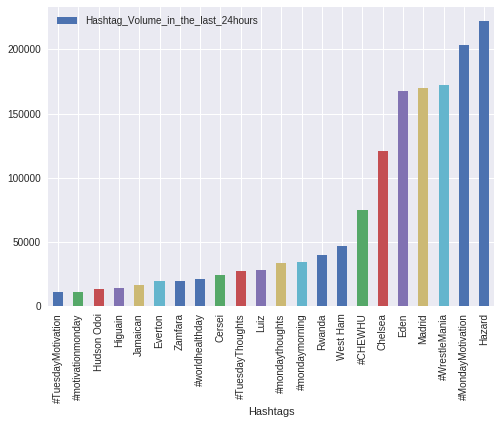

In [23]:
plt.figure(figsize=(15,15))

frame.plot(kind='bar', x='Hashtags', y='Hashtag_Volume_in_the_last_24hours')
frame = frame.sort_values('Hashtag_Volume_in_the_last_24hours', ascending=True)

plt.show()

### This is the beginning of NLTK analysis on the tweet texts